# Developed by Jonathan Ojeda 18/2/2021 QAAFI UQ

_**Functionality:**_ Define the cluster number to be used by the [k-means](https://www.geeksforgeeks.org/k-means-clustering-introduction/) clustering function in `k-clustering-env.ipynb` at Mapping Tools repo. Here the Elbow Method For Optimal k is used.

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Read data
A csv with the environmental data is required (`envGraeme.csv`)

In [2]:
data = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\envGraeme.csv')
data.head()

,lat,lon,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,wind_a,hur_a,...,sw40_80,sw80_harv,sw_stress_expan,sw_stress_photo,temp40DAS,temp80DAS,tempHarv,tp0_40,tp40_80,tp80_harv
0,26.25,-98.25,101.451232,1485.068086,102.070737,1656.519444,168.582482,1288.318815,3.313698,69.106140,...,0.599133,0.325233,0.486267,0.528850,27.705534,29.954134,30.616850,0.999733,1.000000,1.000000
1,26.25,-97.75,120.379988,1457.226050,116.056331,1608.712125,218.881505,1259.478545,3.635881,69.832310,...,0.649353,0.444338,0.573985,0.614294,27.624823,29.675648,30.087868,0.999765,1.000000,1.000000
2,26.25,-80.25,302.262014,1552.730923,445.093349,1409.881997,437.423147,1216.124164,3.184109,73.627110,...,0.999575,1.000000,0.980167,0.980283,25.945366,27.805600,28.530317,0.999567,1.000000,1.000000
3,26.75,-99.25,102.039210,1492.454966,109.050728,1652.926605,152.524321,1281.923292,3.293787,62.682100,...,0.558528,0.305417,0.625042,0.677125,28.625500,30.776278,31.335180,0.999722,0.999722,0.999667
4,26.75,-98.75,103.710020,1488.771635,107.401054,1669.688478,171.812522,1289.996954,3.255952,68.902336,...,0.623161,0.332964,0.582018,0.626089,27.404142,29.792213,30.563232,0.999571,1.000000,1.000000


In [3]:
data.columns

Index(['lat', 'lon', 'rain_a', 'radn_a', 'rain_b', 'radn_b', 'rain_c',
       'radn_c', 'wind_a', 'hur_a', 'hurtmax_a', 'cropland_a', 'tmax_a',
       'tmin_a', 'tmean_a', 'wind_b', 'hur_b', 'hurtmax_b', 'cropland_b',
       'tmax_b', 'tmin_b', 'tmean_b', 'wind_c', 'hur_c', 'hurtmax_c',
       'cropland_c', 'tmax_c', 'tmin_c', 'tmean_c', 'radn', 'rain', 'tmin',
       'tmax', 'tmean', 'wind', 'hur', 'hurtmax', 'cropland', 'irr',
       'cultivar', 'time', 'DOY', 'DaysAfterSowing', 'ESW1av', 'FloweringDAS',
       'IrrigationIn', 'LeafNo', 'MaxLAI', 'N_stress_expan', 'N_stress_photo',
       'PAWC', 'RadiationIn', 'RainIn', 'TempIn', 'WU', 'aMaxT', 'aMinT',
       'actual_ET', 'biomass', 'planting_date', 'potential_ET', 'rad40DAS',
       'rad80DAS', 'radHarv', 'rain40DAS', 'rain80DAS', 'rainHarv', 'ri0_40',
       'ri40_80', 'ri80_harv', 'scen', 'sw0_40', 'sw40_80', 'sw80_harv',
       'sw_stress_expan', 'sw_stress_photo', 'temp40DAS', 'temp80DAS',
       'tempHarv', 'tp0_40', 'tp40_80

## Select the variables will be involved in the clustering

- `categorical_features` indicates the spatial scale.
- `continuous_features` indicates the variables used to do the clustering.

In [5]:
categorical_features = ['lat', 'lon']
continuous_features = ['ri0_40','ri40_80', 'ri80_harv','sw0_40', 'sw40_80', 'sw80_harv','tp0_40', 'tp40_80', 'tp80_harv']

In [6]:
data[continuous_features].describe()

,ri0_40,ri40_80,ri80_harv,sw0_40,sw40_80,sw80_harv,tp0_40,tp40_80,tp80_harv
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,71.691848,648.987103,544.072193,0.848354,0.846593,0.795094,0.942893,0.978644,0.894735
std,35.920678,102.949926,78.950238,0.077169,0.134349,0.181618,0.055516,0.041570,0.145582
min,10.836213,274.104980,155.151760,0.360381,0.402548,0.288938,0.725793,0.696800,0.236817
25%,44.018898,585.823800,513.339700,0.814164,0.767625,0.660240,0.918138,0.976241,0.846517
50%,69.742320,671.204800,556.205570,0.868067,0.879879,0.840080,0.964035,0.998567,0.964190
75%,93.318130,722.201230,594.296750,0.900172,0.959054,0.961550,0.983690,0.999800,0.999000
max,206.501330,860.304500,693.929900,0.950000,1.000000,1.000000,0.999778,1.000000,1.000000


In [7]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,wind_a,hur_a,hurtmax_a,cropland_a,...,lon_-76.75,lon_-76.25,lon_-75.75,lon_-75.25,lon_-74.75,lon_-74.25,lon_-73.75,lon_-73.25,lon_-72.75,lon_-72.25
0,101.451232,1485.068086,102.070737,1656.519444,168.582482,1288.318815,3.313698,69.106140,48.211823,13.0,...,0,0,0,0,0,0,0,0,0,0
1,120.379988,1457.226050,116.056331,1608.712125,218.881505,1259.478545,3.635881,69.832310,50.229427,51.0,...,0,0,0,0,0,0,0,0,0,0
2,302.262014,1552.730923,445.093349,1409.881997,437.423147,1216.124164,3.184109,73.627110,57.786846,4.0,...,0,0,0,0,0,0,0,0,0,0
3,102.039210,1492.454966,109.050728,1652.926605,152.524321,1281.923292,3.293787,62.682100,43.158440,9.0,...,0,0,0,0,0,0,0,0,0,0
4,103.710020,1488.771635,107.401054,1669.688478,171.812522,1289.996954,3.255952,68.902336,47.898296,8.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [9]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

## Representation of the Elbow method to calculate the optimum number of clusters used for the environmental zones. The blue line represents the sum of squared distances vs number of clusters (k). The red line represents the optimum number of clusters (k=3).

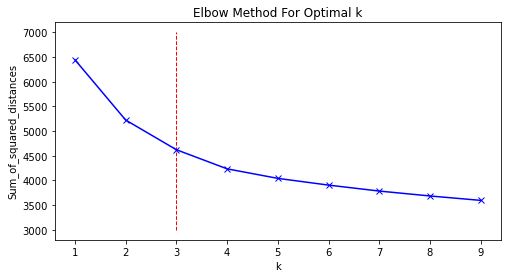

In [120]:
fig = plt.figure(figsize=(8,4))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
ax = plt.gca()
#ax.set_ylim([100000,150000])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.plot([3,3],[3000,7000],"--",color="red", linewidth=1,zorder=1)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\kmeans.png', dpi=300,bbox_inches='tight')